In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '/content/dataset.csv'  # Path to your uploaded dataset
data = pd.read_csv(file_path)

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [ ]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
data.shape

(1190, 12)

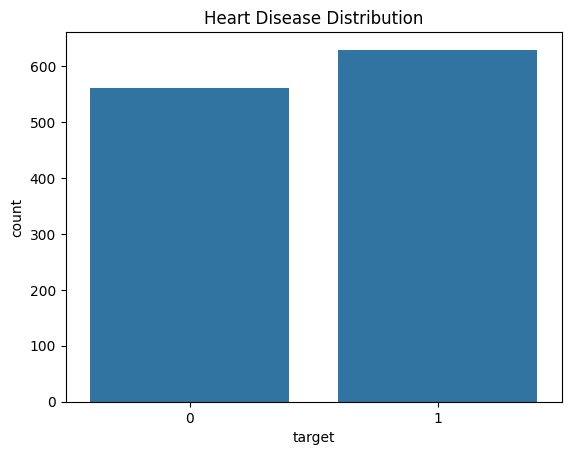

In [ ]:
# EDA: Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.countplot(x='target', data=data)
plt.title('Heart Disease Distribution')
plt.show()

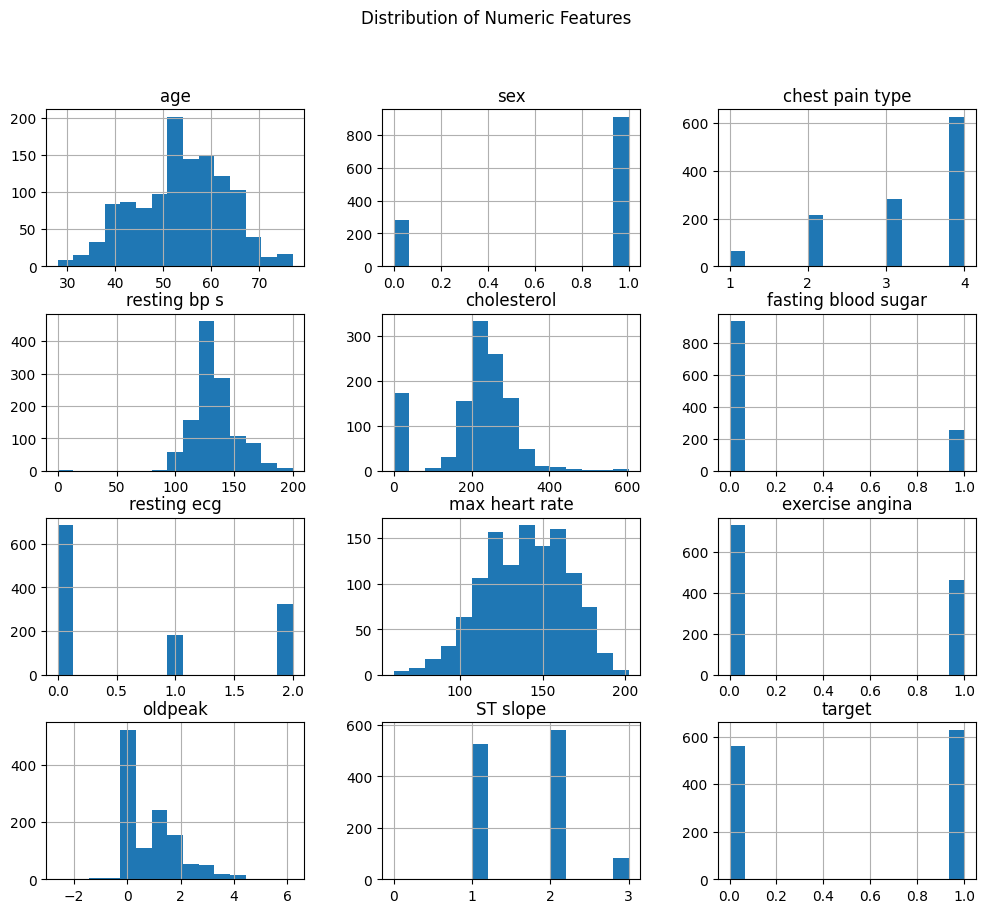

In [ ]:
# Distribution of numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features].hist(figsize=(12, 10), bins=15)
plt.suptitle('Distribution of Numeric Features')
plt.show()

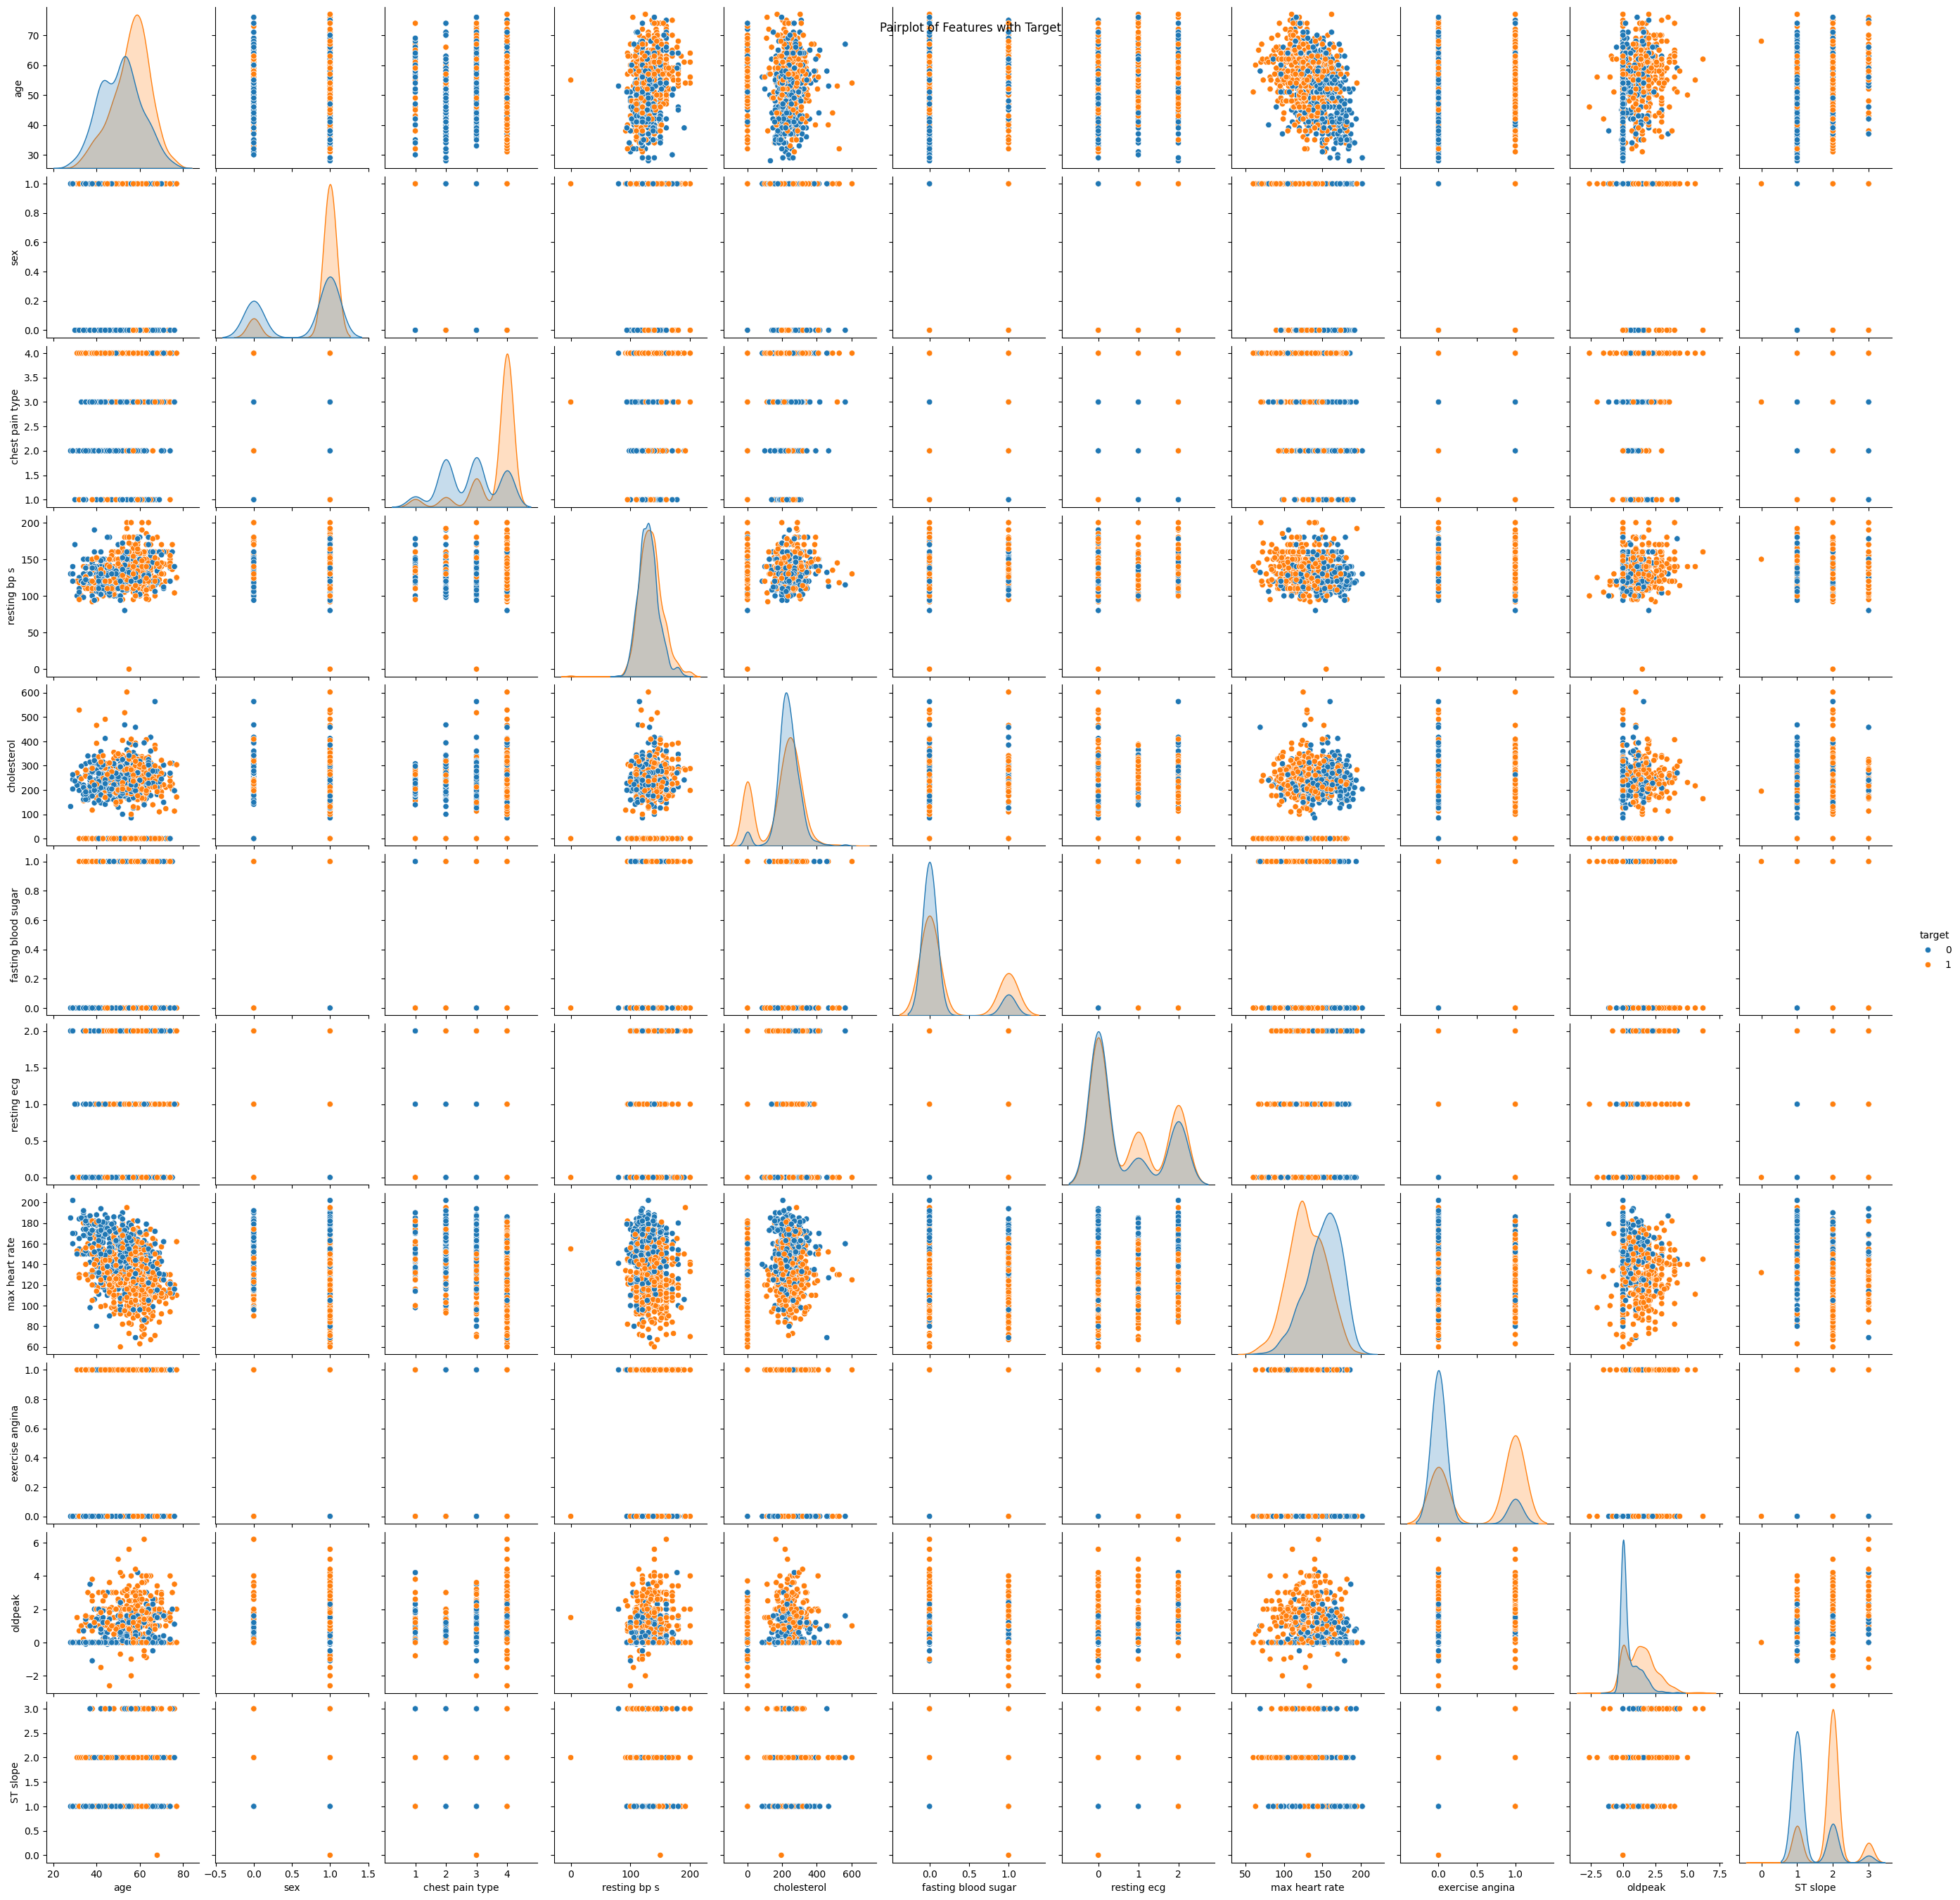

In [ ]:
# Pairplot to understand feature relationships
sns.pairplot(data, hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Features with Target')
plt.show()

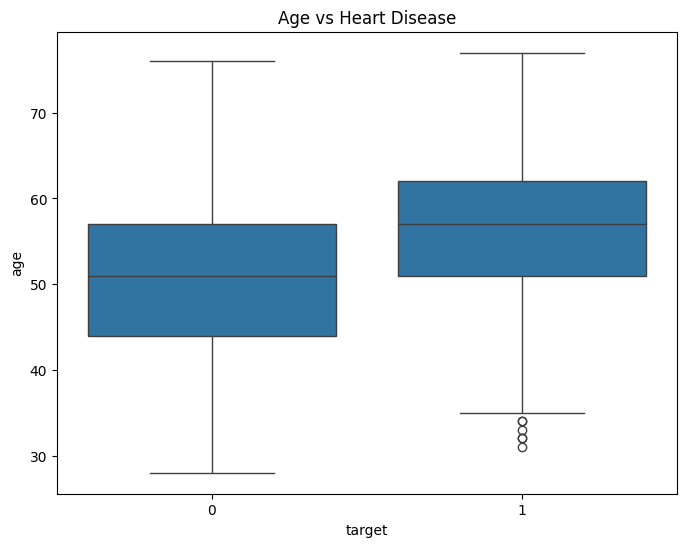

In [ ]:
# Boxplot for age vs target (Heart Disease)
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='age', data=data)
plt.title('Age vs Heart Disease')
plt.show()

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


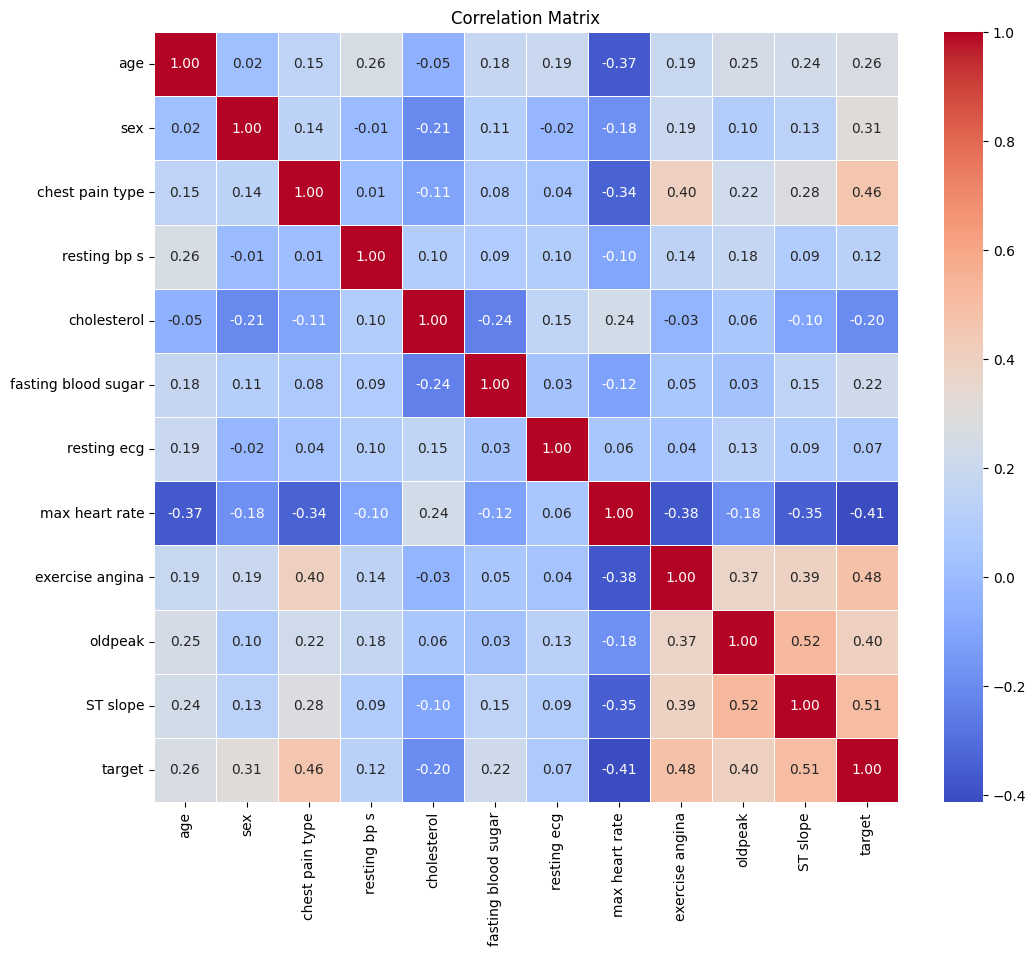

In [ ]:
# Correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Split data into features and target variable
X = data.drop(columns=['target'])
y = data['target']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Function to take input from the user
def get_user_input():
    print("\nPlease enter the following details for heart disease prediction:")
    age = int(input("Age (in years): "))
    sex = int(input("Sex (0 = Female, 1 = Male): "))
    chest_pain = int(input("Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic): "))
    resting_bp = int(input("Resting Blood Pressure (in mmHg): "))
    serum_chol = int(input("Serum Cholesterol (in mg/dl): "))
    fasting_bs = int(input("Fasting Blood Sugar (1 = Sugar > 120mg/dl, 0 = Sugar < 120mg/dl): "))
    resting_ecg = int(input("Resting Electrocardiogram Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy): "))
    max_heart_rate = int(input("Maximum Heart Rate Achieved: "))
    exercise_angina = int(input("Exercise Induced Angina (0 = No, 1 = Yes): "))
    oldpeak = float(input("Oldpeak = ST Depression: "))
    st_slope = int(input("Slope of Peak Exercise ST Segment (1 = Upward, 2 = Flat, 3 = Downward): "))

    user_input = [[age, sex, chest_pain, resting_bp, serum_chol, fasting_bs, resting_ecg, max_heart_rate,
                   exercise_angina, oldpeak, st_slope]]
    return user_input

# Function to show prediction and verify
def predict_and_verify():
    user_input = get_user_input()

    # Scale the user input just like the training data
    user_input_scaled = scaler.transform(user_input)

    # Make the prediction
    predicted_label = model.predict(user_input_scaled)[0]

    # Output the prediction
    if predicted_label == 0:
        print("\nThe model predicts: No Heart Disease")
    else:
        print("\nThe model predicts: Heart Disease")

    # Check if the prediction matches the dataset’s most likely outcome
    print("\nNow, checking the model’s prediction with the known dataset prediction...")

    # Find the closest match in the test set to the user input (this is just an approximation)
    closest_match_idx = ((X_test - user_input_scaled)**2).sum(axis=1).argmin()
    actual_label = y_test.iloc[closest_match_idx]

    # Verify if the prediction matches the actual label
    if predicted_label == actual_label:
        print(f"Prediction is correct! Actual label: {actual_label} and Predicted label: {predicted_label}")
    else:
        print(f"Prediction is incorrect! Actual label: {actual_label} and Predicted label: {predicted_label}")

# Call the function to predict and verify
predict_and_verify()

# Evaluate the model on the test set
y_pred = model.predict(X_test)



Please enter the following details for heart disease prediction:
Age (in years): 18
Sex (0 = Female, 1 = Male): 1
Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic): 2
Resting Blood Pressure (in mmHg): 22
Serum Cholesterol (in mg/dl): 35
Fasting Blood Sugar (1 = Sugar > 120mg/dl, 0 = Sugar < 120mg/dl): 1
Resting Electrocardiogram Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy): 1
Maximum Heart Rate Achieved: 78
Exercise Induced Angina (0 = No, 1 = Yes): 1
Oldpeak = ST Depression: 67
Slope of Peak Exercise ST Segment (1 = Upward, 2 = Flat, 3 = Downward): 2

The model predicts: Heart Disease

Now, checking the model’s prediction with the known dataset prediction...
Prediction is correct! Actual label: 1 and Predicted label: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Function to take input from the user
def get_user_input():
    print("\nPlease enter the following details for heart disease prediction:")
    age = int(input("Age (in years): "))
    sex = int(input("Sex (0 = Female, 1 = Male): "))
    chest_pain = int(input("Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic): "))
    resting_bp = int(input("Resting Blood Pressure (in mmHg): "))
    serum_chol = int(input("Serum Cholesterol (in mg/dl): "))
    fasting_bs = int(input("Fasting Blood Sugar (1 = Sugar > 120mg/dl, 0 = Sugar < 120mg/dl): "))
    resting_ecg = int(input("Resting Electrocardiogram Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy): "))
    max_heart_rate = int(input("Maximum Heart Rate Achieved: "))
    exercise_angina = int(input("Exercise Induced Angina (0 = No, 1 = Yes): "))
    oldpeak = float(input("Oldpeak = ST Depression: "))
    st_slope = int(input("Slope of Peak Exercise ST Segment (1 = Upward, 2 = Flat, 3 = Downward): "))

    user_input = [[age, sex, chest_pain, resting_bp, serum_chol, fasting_bs, resting_ecg, max_heart_rate,
                   exercise_angina, oldpeak, st_slope]]
    return user_input

# Function to show prediction and verify
def predict_and_verify():
    user_input = get_user_input()

    # Scale the user input just like the training data
    user_input_scaled = scaler.transform(user_input)

    # Make the prediction
    predicted_label = model.predict(user_input_scaled)[0]

    # Output the prediction
    if predicted_label == 0:
        print("\nThe model predicts: No Heart Disease")
    else:
        print("\nThe model predicts: Heart Disease")

    # Check if the prediction matches the dataset’s most likely outcome
    print("\nNow, checking the model’s prediction with the known dataset prediction...")

    # Find the closest match in the test set to the user input (this is just an approximation)
    closest_match_idx = ((X_test - user_input_scaled)**2).sum(axis=1).argmin()
    actual_label = y_test.iloc[closest_match_idx]

    # Verify if the prediction matches the actual label
    if predicted_label == actual_label:
        print(f"Prediction is correct! Actual label: {actual_label} and Predicted label: {predicted_label}")
    else:
        print(f"Prediction is incorrect! Actual label: {actual_label} and Predicted label: {predicted_label}")

# Call the function to predict and verify
predict_and_verify()

# Evaluate the model on the test set
y_pred = model.predict(X_test)



Please enter the following details for heart disease prediction:
Age (in years): 45
Sex (0 = Female, 1 = Male): 0
Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic): 1
Resting Blood Pressure (in mmHg): 120
Serum Cholesterol (in mg/dl): 180
Fasting Blood Sugar (1 = Sugar > 120mg/dl, 0 = Sugar < 120mg/dl): 0
Resting Electrocardiogram Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy): 0
Maximum Heart Rate Achieved: 150
Exercise Induced Angina (0 = No, 1 = Yes): 0
Oldpeak = ST Depression: 0.5
Slope of Peak Exercise ST Segment (1 = Upward, 2 = Flat, 3 = Downward): 1

The model predicts: No Heart Disease

Now, checking the model’s prediction with the known dataset prediction...
Prediction is correct! Actual label: 0 and Predicted label: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Print the predictions
print("\nPredictions:")
print(y_pred)


Predictions:
[1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1]


In [ ]:
# Print actual vs predicted values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted values:")
print(predictions_df.head())  # Display the first 5 rows to check


Actual vs Predicted values:
     Actual  Predicted
390       1          1
247       1          1
260       0          0
155       1          1
984       1          1


In [ ]:
# Print all predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nAll Actual vs Predicted values:")
print(predictions_df)


All Actual vs Predicted values:
      Actual  Predicted
390        1          1
247        1          1
260        0          0
155        1          1
984        1          1
...      ...        ...
535        1          1
1037       0          1
812        0          0
139        1          1
599        1          1

[238 rows x 2 columns]



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238


Confusion Matrix:


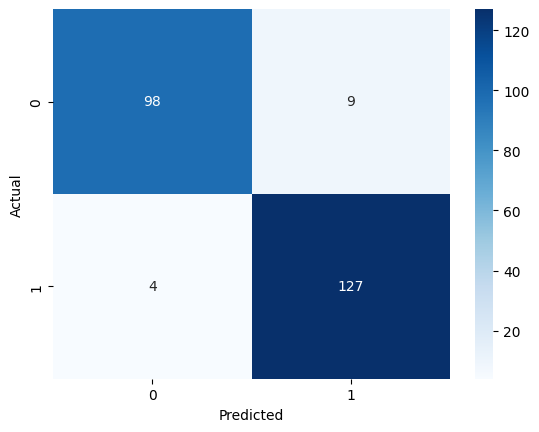

In [ ]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

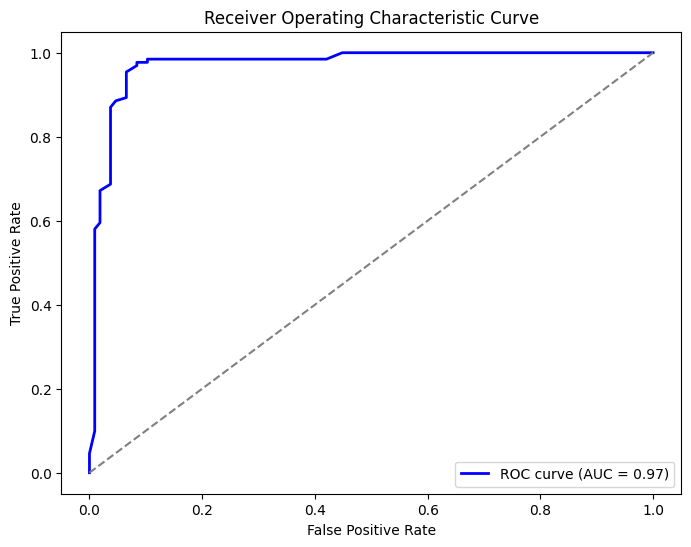

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()
